<a href="https://colab.research.google.com/github/areeseb/demographicsofsound/blob/main/data_wrangler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries/Mount Drive**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 30.3 MB/s 
     |████████████████████████████████| 15.4 MB 24.9 MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import csv
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Test/Plot Sample Data & Demographic Data**

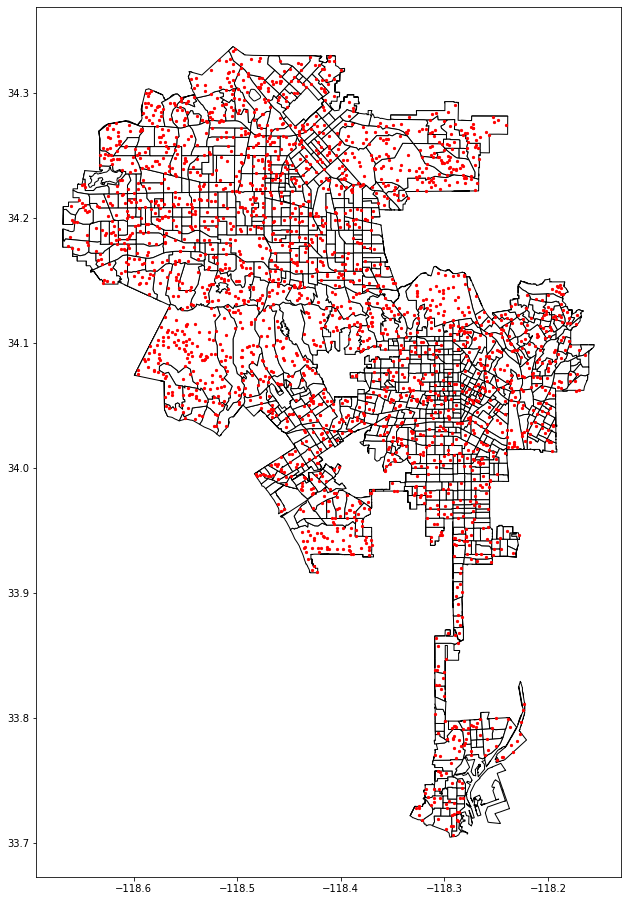

In [ ]:
dem_df = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/Los_Angeles_Demographics_2019.geojson')
points_df = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/demographic_sounds_points.geojson')
base = dem_df.plot(figsize=(24,16), color='white', edgecolor='black')
points_df.plot(ax=base, marker='o', color='red', markersize=5);

In [ ]:

test_df = pd.read_csv(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/sample_locations.csv') #change this path to your own drive directory
test_gdf = gpd.GeoDataFrame(
    test_df, geometry=gpd.points_from_xy(test_df.CENTER_LON, test_df.CENTER_LAT))

In [ ]:
test_gdf.to_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/sample_locations.geojson', driver='GeoJSON') #change this path to your own drive directory

In [ ]:
for col in test_gdf.columns:
    print(col)

Unnamed: 0
AIN
City
CENTER_LAT
CENTER_LON
Location 1
geometry


In [ ]:
dem_df = gpd.read_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/Los_Angeles_Demographics_2019.geojson')
dem_df.head(5)

,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,...,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,Shape__Area,Shape__Length,geometry
0,1,06037224320,060372243.20,California,CA,3458,3452,30820.0,1082,3.19,...,58,1024,46,14,277,2941,56,4.234000e+05,3098.757449,"POLYGON ((-118.27695 34.04465, -118.27875 34.0..."
1,2,06037300902,060373009.02,California,CA,2096,2096,1236.2,751,2.79,...,677,74,515,142,1810,188,13,6.491110e+04,5270.260252,"MULTIPOLYGON (((-118.21121 34.14656, -118.2109..."
2,3,06037700102,060377001.02,California,CA,4692,4668,24746.8,2774,1.68,...,163,2611,139,27,305,3733,54,6.459184e+03,4724.589120,"MULTIPOLYGON (((-118.35238 34.08896, -118.3512..."
3,4,06037265100,060372651.00,California,CA,2585,2585,2834.1,1265,2.04,...,868,397,538,335,1956,533,229,3.453884e+06,8702.588718,"POLYGON ((-118.42318 34.07993, -118.42324 34.0..."
4,5,06037104203,060371042.03,California,CA,5454,5446,19956.1,1125,4.84,...,509,616,455,65,2858,2344,76,1.037657e+06,4079.093135,"POLYGON ((-118.40515 34.27846, -118.40986 34.2..."


994

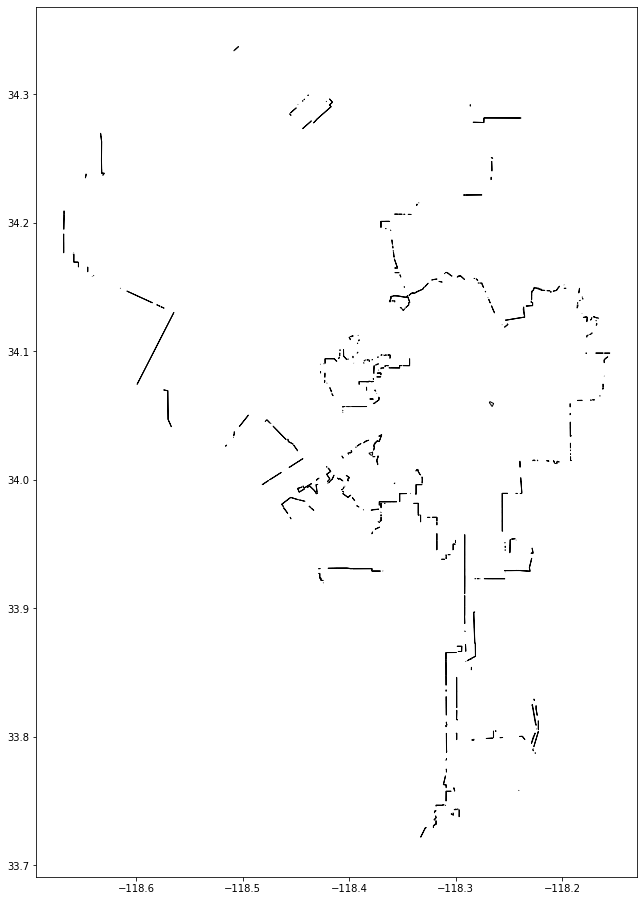

In [ ]:
dem_df[dem_df.Shape__Area < 110000].plot(figsize=(24,16), color='white', edgecolor='black')
len(dem_df[(dem_df.geom_type == 'Polygon') & (dem_df.Shape__Area > 100000)])

994

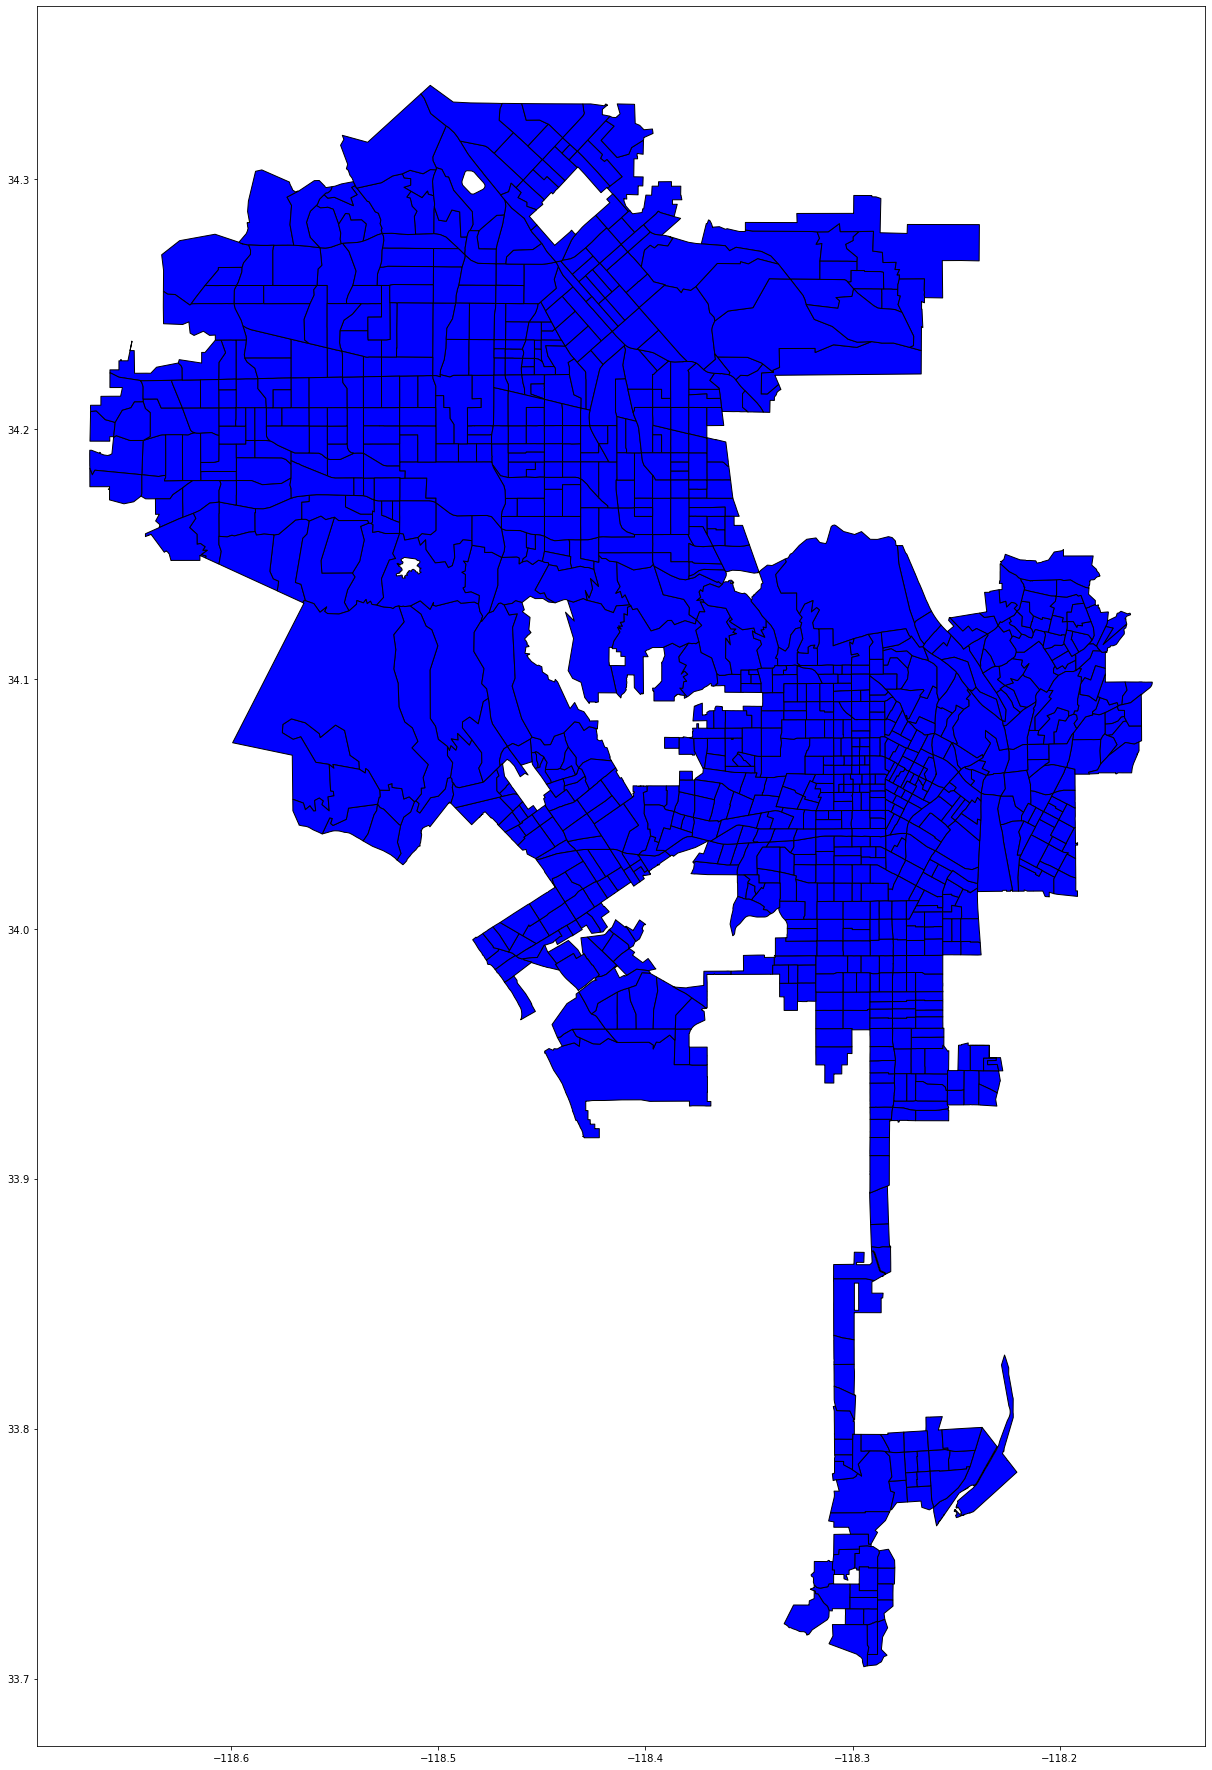

In [ ]:
dem_df[(dem_df.geom_type == 'Polygon') & (dem_df.Shape__Area > 100000)].plot(figsize=(48,32), color='blue', edgecolor='black')
len(dem_df[(dem_df.geom_type == 'Polygon') & (dem_df.Shape__Area > 100000)])

In [ ]:
dem_df_file = dem_df[(dem_df.geom_type == 'Polygon') & (dem_df.Shape__Area > 100000)]
dem_df_file.to_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/filtered_demographics.geojson', driver='GeoJSON')

In [ ]:
random_points_df = gpd.read_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/la_random_points.geojson')

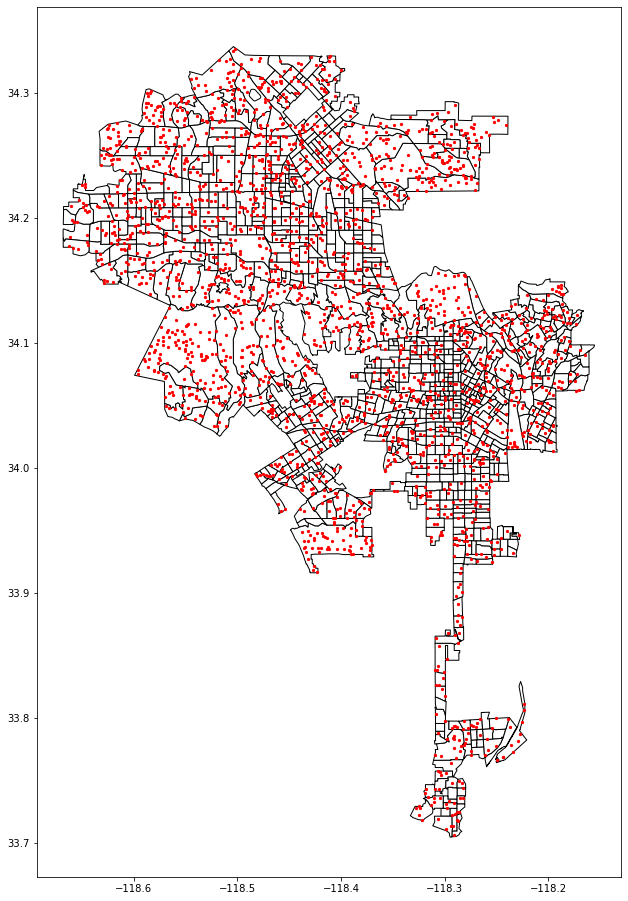

In [ ]:
base = dem_df_file.plot(figsize=(24,16), color='white', edgecolor='black')
random_points_df.plot(ax=base, marker='o', color='red', markersize=5);

# **Join Random Points to Demographic Data**

In [ ]:
### Inner join the random points with the demograpic polygons
random_points_df = gpd.read_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/la_random_points.geojson')
join_gdf = random_points_df.sjoin(dem_df_file, how="inner")
join_gdf.to_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/demographic_points.geojson', driver='GeoJSON')

,OID,CID,POINT_X,POINT_Y,geometry,index_right,OBJECTID,ID,NAME,STATE_NAME,...,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,Shape__Area,Shape__Length
0,1,1,-118.353531,34.042609,POINT (-118.35353 34.04261),769,770,06037218300,060372183.00,California,...,2210,571,1467,512,96,1901,3605,172,1.299404e+06,6367.014771
1,2,1,-118.373527,34.096851,POINT (-118.37353 34.09685),323,324,06037194200,060371942.00,California,...,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961
476,477,1,-118.378630,34.102062,POINT (-118.37863 34.10206),323,324,06037194200,060371942.00,California,...,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961
1029,1030,1,-118.367544,34.097510,POINT (-118.36754 34.09751),323,324,06037194200,060371942.00,California,...,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961
1232,1233,1,-118.374178,34.102882,POINT (-118.37418 34.10288),323,324,06037194200,060371942.00,California,...,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961


In [ ]:
dem_points_gdf = gpd.read_file(r'/Users/alexanderbrown/USC/DSCI550/Final_Project/Data/demographic_points.geojson')
dem_points_gdf.head()

,OID,CID,POINT_X,POINT_Y,index_right,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,...,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,Shape__Area,Shape__Length,geometry
0,1,1,-118.353531,34.042609,769,770,06037218300,060372183.00,California,CA,...,571,1467,512,96,1901,3605,172,1.299404e+06,6367.014771,POINT (-118.35353 34.04261)
1,2,1,-118.373527,34.096851,323,324,06037194200,060371942.00,California,CA,...,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,POINT (-118.37353 34.09685)
2,477,1,-118.378630,34.102062,323,324,06037194200,060371942.00,California,CA,...,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,POINT (-118.37863 34.10206)
3,1030,1,-118.367544,34.097510,323,324,06037194200,060371942.00,California,CA,...,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,POINT (-118.36754 34.09751)
4,1233,1,-118.374178,34.102882,323,324,06037194200,060371942.00,California,CA,...,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,POINT (-118.37418 34.10288)


# **Querying API and Joining Data**


In [ ]:
dem_points_gdf = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/demographic_points.geojson')

In [ ]:
lats = dem_points_gdf['POINT_Y'].values.tolist()
longs = dem_points_gdf['POINT_X'].values.tolist()

**Test API Query**

In [ ]:
key = "http://elb1.howloud.com/score?key={}&longitude={}&latitude={}".format('pqvrnGsDmBhIucpR',longs[124],lats[124])
test_resp = resp = requests.get(key)
test_resp_json = resp.json()

In [ ]:
test_resp_json

{'request': {'key': 'pqvrnGsDmBhIucpR',
  'latitude': '34.25603932800004',
  'longitude': '-118.62922153399995'},
 'result': [],
 'status': 'ZERO_RESULTS'}

In [ ]:
# local_noise.append('ZERO_RESULT')
# airport_noise.append('ZERO_RESULT')
# traffic_noise.append('ZERO_RESULT')
# sound_score.append('ZERO_RESULT')
# # local_noise.append(test_resp_json['result'][0]['local'])
# # airport_noise.append(test_resp_json['result'][0]['airports'])
# # traffic_noise.append(test_resp_json['result'][0]['traffic'])
# # sound_score.append(test_resp_json['result'][0]['score'])

**Query A**

In [ ]:
api_keys = []
for lat, long in zip(lats[143:], longs[143:]):
    key = "http://elb1.howloud.com/score?key={}&longitude={}&latitude={}".format('pqvrnGsDmBhIucpR',long,lat)
    resp = requests.get(key)
    resp_json = resp.json()
    if str(resp_json['status']) == 'ZERO_RESULTS':
      local_noise.append('ZERO_RESULT')
      airport_noise.append('ZERO_RESULT')
      traffic_noise.append('ZERO_RESULT')
      sound_score.append('ZERO_RESULT')
    else:
      local_noise.append(resp_json['result'][0]['local'])
      airport_noise.append(resp_json['result'][0]['airports'])
      traffic_noise.append(resp_json['result'][0]['traffic'])
      sound_score.append(resp_json['result'][0]['score'])


In [ ]:
resp_json['status']

'ZERO_RESULTS'

In [ ]:
dem_points_gdf['local_noise'] = local_noise
dem_points_gdf['airport_noise'] = airport_noise
dem_points_gdf['traffic_noise'] = traffic_noise
dem_points_gdf['sound_score'] = sound_score

In [ ]:
print(len(local_noise))
print(len(airport_noise))
print(len(traffic_noise))
print(len(sound_score))

2500
2500
2500
2500


In [ ]:
dem_points_gdf.to_file(r'/content/drive/My Drive/550/Final_Project/demographic_sounds_points.geojson', driver='GeoJSON')

# **Data Cleaning**

In [ ]:
dem_points_raw_df = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/demographic_sounds_points.geojson')
dem_points_raw_df.head(100)

,OID,CID,POINT_X,POINT_Y,index_right,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,HHGRW10CY,GENALPHACY,GENZ_CY,MILLENN_CY,GENX_CY,BABYBOOMCY,OLDRGENSCY,GENBASE_CY,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,POP35_CY,POP40_CY,POP45_CY,POP50_CY,POP55_CY,POP60_CY,POP65_CY,POP70_CY,POP75_CY,...,HINC50_CY,HINC75_CY,HINC100_CY,HINC150_CY,HINC200_CY,MEDHINC_CY,AVGHINC_CY,PCI_CY,HINCBASECY,MEDVAL_CY,AVGVAL_CY,TOTPOP_FY,HHPOP_FY,POPDENS_FY,TOTHH_FY,AVGHHSZ_FY,POPGRWCYFY,HHGRWCYFY,PCIGRWCYFY,MHIGRWCYFY,DIVINDX_FY,MEDHINC_FY,AVGHINC_FY,PCI_FY,TOTPOP10,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,Shape__Area,Shape__Length,local_noise,airport_noise,traffic_noise,sound_score,geometry
0,1,1,-118.353531,34.042609,769,770,06037218300,060372183.00,California,CA,5644,5629,16397.4,2038,2.76,0.27,0.17,135,1232,1736,1259,993,289,5644,326,320,333,388,497,538,438,436,399,405,350,316,275,233,155,100,...,410,234,178,70,61,46092,60922,22113,2038,585300,600175,5726,5711,16635.7,2055,2.78,0.29,0.17,4.11,3.32,91.5,54258,75031,27041,5520,2210,571,1467,512,96,1901,3605,172,1.299404e+06,6367.014771,4,0,26,69,POINT (-118.35353 34.04261)
1,2,1,-118.373527,34.096851,323,324,06037194200,060371942.00,California,CA,3619,3619,3600.6,1776,2.04,0.10,-0.16,54,486,753,1157,889,280,3619,147,157,133,103,135,184,250,318,365,382,340,288,242,206,139,101,...,212,130,284,90,756,140157,208204,102175,1776,1556533,1599924,3632,3632,3613.6,1766,2.06,0.07,-0.11,2.37,4.67,37.9,176112,236239,114867,3588,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,0,0,26,72,POINT (-118.37353 34.09685)
2,477,1,-118.378630,34.102062,323,324,06037194200,060371942.00,California,CA,3619,3619,3600.6,1776,2.04,0.10,-0.16,54,486,753,1157,889,280,3619,147,157,133,103,135,184,250,318,365,382,340,288,242,206,139,101,...,212,130,284,90,756,140157,208204,102175,1776,1556533,1599924,3632,3632,3613.6,1766,2.06,0.07,-0.11,2.37,4.67,37.9,176112,236239,114867,3588,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,0,0,23,76,POINT (-118.37863 34.10206)
3,1030,1,-118.367544,34.097510,323,324,06037194200,060371942.00,California,CA,3619,3619,3600.6,1776,2.04,0.10,-0.16,54,486,753,1157,889,280,3619,147,157,133,103,135,184,250,318,365,382,340,288,242,206,139,101,...,212,130,284,90,756,140157,208204,102175,1776,1556533,1599924,3632,3632,3613.6,1766,2.06,0.07,-0.11,2.37,4.67,37.9,176112,236239,114867,3588,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,1,0,27,70,POINT (-118.36754 34.09751)
4,1233,1,-118.374178,34.102882,323,324,06037194200,060371942.00,California,CA,3619,3619,3600.6,1776,2.04,0.10,-0.16,54,486,753,1157,889,280,3619,147,157,133,103,135,184,250,318,365,382,340,288,242,206,139,101,...,212,130,284,90,756,140157,208204,102175,1776,1556533,1599924,3632,3632,3613.6,1766,2.06,0.07,-0.11,2.37,4.67,37.9,176112,236239,114867,3588,1982,1321,455,1125,249,2790,798,206,3.790752e+06,9867.261961,0,0,23,76,POINT (-118.37418 34.10288)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,1,-118.164013,34.090927,996,997,06037201501,060372015.01,California,CA,5529,5510,16152.5,1547,3.56,0.50,0.41,152,1443,1572,1134,904,324,5529,391,394,399,411,461,475,413,366,347,384,321,283,245,206,173,123,...,376,215,150,60,5,51346,60866,17178,1547,409024,424461,5658,5639,16529.4,1576,3.58,0.46,0.37,2.60,1.76,83.8,56020,69601,19532,5306,1601,603,944,475,145,2249,3039,54,1.299104e+06,5293.602981,3,0,29,67,POINT (-118.16401 34.09093)
96,18,1,-118.472194,34.079786,483,484,06037262302,060372623.02,California,CA,2893,2893,2450.7,1212,2.39,0.32,0.14,50,628,444,600,777,394,2893,136,170,201,171,121,103,121,170,175,187,210,230,211,191,165,

In [ ]:
clean_df = dem_points_raw_df.columns
for column in clean_df:
  print(column)

OID
CID
POINT_X
POINT_Y
index_right
OBJECTID
ID
NAME
STATE_NAME
ST_ABBREV
TOTPOP_CY
HHPOP_CY
POPDENS_CY
TOTHH_CY
AVGHHSZ_CY
POPGRW10CY
HHGRW10CY
GENALPHACY
GENZ_CY
MILLENN_CY
GENX_CY
BABYBOOMCY
OLDRGENSCY
GENBASE_CY
POP0_CY
POP5_CY
POP10_CY
POP15_CY
POP20_CY
POP25_CY
POP30_CY
POP35_CY
POP40_CY
POP45_CY
POP50_CY
POP55_CY
POP60_CY
POP65_CY
POP70_CY
POP75_CY
POP80_CY
POP85_CY
MEDAGE_CY
MALES_CY
MEDMAGE_CY
FEMALES_CY
MEDFAGE_CY
AGEBASE_CY
CIVLBFR_CY
EMP_CY
UNEMP_CY
UNEMPRT_CY
HISPPOP_CY
NHSPWHT_CY
NHSPBLK_CY
NHSPAI_CY
NHSPASN_CY
NHSPPI_CY
NHSPOTH_CY
NHSPMLT_CY
DIVINDX_CY
RACEBASECY
HINC0_CY
HINC15_CY
HINC25_CY
HINC35_CY
HINC50_CY
HINC75_CY
HINC100_CY
HINC150_CY
HINC200_CY
MEDHINC_CY
AVGHINC_CY
PCI_CY
HINCBASECY
MEDVAL_CY
AVGVAL_CY
TOTPOP_FY
HHPOP_FY
POPDENS_FY
TOTHH_FY
AVGHHSZ_FY
POPGRWCYFY
HHGRWCYFY
PCIGRWCYFY
MHIGRWCYFY
DIVINDX_FY
MEDHINC_FY
AVGHINC_FY
PCI_FY
TOTPOP10
TOTHU_CY
OWNER_CY
RENTER_CY
OOMORT10
OONOMORT10
POPOWN10
POPRENT10
VACANT_CY
Shape__Area
Shape__Length
local_noise
airpor

In [ ]:
##remove columns and rename
dem_df_filtered = dem_points_raw_df[['OID','AVGHHSZ_CY', 'POPGRW10CY', 'MEDAGE_CY','UNEMPRT_CY',
 'HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY',
 'NHSPASN_CY', 'NHSPPI_CY', 'NHSPOTH_CY', 'NHSPMLT_CY',
 'DIVINDX_CY', 'MEDHINC_CY', 'AVGHINC_CY', 'local_noise',
 'airport_noise', 'traffic_noise', 'sound_score', 'geometry']]

dem_df_filtered = dem_df_filtered.rename(columns={'AVGHHSZ_CY':'avg_hh_size', 'POPGRW10CY':'pop_growth_rt', 'MEDAGE_CY':'med_age',
                                'UNEMPRT_CY': 'unemply_rate', 'HISPPOP_CY':'hisp_pop','NHSPWHT_CY':'wht_pop',
                                'NHSPBLK_CY': 'blk_pop','NHSPAI_CY':'ai_na_pop', 'NHSPASN_CY':'asn_pop',
                                'NHSPPI_CY':'pi_pop','NHSPOTH_CY':'othr_pop','NHSPMLT_CY':'mtpl_pop',
                                'DIVINDX_CY':'divst_indx', 'MEDHINC_CY':'med_inc', 'AVGHINC_CY':'avg_inc'})

# dem_df_filtered = dem_points_gdf_test[['OID','TOTPOP_CY','AVGHHSZ_CY', 'POPGRW10CY', 'MEDAGE_CY','UNEMPRT_CY',
#  'HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY',
#  'NHSPASN_CY', 'NHSPPI_CY', 'NHSPOTH_CY', 'NHSPMLT_CY',
#  'DIVINDX_CY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY',
#  'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY',
#  'HINC150_CY', 'HINC200_CY', 'MEDHINC_CY', 'AVGHINC_CY']]

# dem_df_filtered = dem_df_filtered.rename(columns={'TOTPOP_CY':'tot_pop','AVGHHSZ_CY':'avg_hh_size', 'POPGRW10CY':'pop_growth_rt', 'MEDAGE_CY':'med_age',
#                                 'UNEMPRT_CY': 'unemply_rate', 'HISPPOP_CY':'hisp_pop','NHSPWHT_CY':'wht_pop',
#                                 'NHSPBLK_CY': 'blk_pop','NHSPAI_CY':'ai_na_pop', 'NHSPASN_CY':'asn_pop',
#                                 'NHSPPI_CY':'pi_pop','NHSPOTH_CY':'othr_pop','NHSPMLT_CY':'mtpl_pop',
#                                 'DIVINDX_CY':'divst_indx','HINC0_CY':'inc_0','HINC15_CY':'inc_15', 'HINC25_CY':'inc_25',
#                                 'HINC35_CY':'inc_35','HINC50_CY':'inc_50','HINC75_CY':'inc_75','HINC100_CY':'inc_100',
#                                 'HINC150_CY': 'inc_150', 'HINC200_CY':'inc_200', 'MEDHINC_CY':'med_inc', 'AVGHINC_CY':'avg_inc'})


In [ ]:
dem_df_filtered.dtypes

OID                 int64
avg_hh_size       float64
pop_growth_rt     float64
med_age           float64
unemply_rate      float64
hisp_pop            int64
wht_pop             int64
blk_pop             int64
ai_na_pop           int64
asn_pop             int64
pi_pop              int64
othr_pop            int64
mtpl_pop            int64
divst_indx        float64
med_inc             int64
avg_inc             int64
local_noise        object
airport_noise      object
traffic_noise      object
sound_score        object
geometry         geometry
dtype: object

In [ ]:
#create a percentage value of race/ethnicity variables
dem_df_filtered['tot_pop_sum'] = dem_df_filtered[['hisp_pop','wht_pop','blk_pop',
                                    'ai_na_pop','asn_pop','pi_pop',
                                    'othr_pop',	'mtpl_pop']].sum(axis=1)
dem_df_filtered.dtypes

OID                 int64
avg_hh_size       float64
pop_growth_rt     float64
med_age           float64
unemply_rate      float64
hisp_pop            int64
wht_pop             int64
blk_pop             int64
ai_na_pop           int64
asn_pop             int64
pi_pop              int64
othr_pop            int64
mtpl_pop            int64
divst_indx        float64
med_inc             int64
avg_inc             int64
local_noise        object
airport_noise      object
traffic_noise      object
sound_score        object
geometry         geometry
tot_pop_sum         int64
dtype: object

In [ ]:
##calculate percentage values for each racial/ethnic demographic value
pct = 'pct_'
for col in dem_df_filtered.columns:
  if 'pop' in col and col != 'tot_pop_sum':
    dem_df_filtered[pct + col] = dem_df_filtered[col]/dem_df_filtered['tot_pop_sum']

dem_df_filtered

,OID,avg_hh_size,pop_growth_rt,med_age,unemply_rate,hisp_pop,wht_pop,blk_pop,ai_na_pop,asn_pop,pi_pop,othr_pop,mtpl_pop,divst_indx,med_inc,avg_inc,local_noise,airport_noise,traffic_noise,sound_score,geometry,tot_pop_sum,pct_pop_growth_rt,pct_hisp_pop,pct_wht_pop,pct_blk_pop,pct_ai_na_pop,pct_asn_pop,pct_pi_pop,pct_othr_pop,pct_mtpl_pop
0,1,2.76,0.27,34.8,6.2,3110,341,1783,12,204,4,24,166,91.3,46092,60922,4,0,26,69,POINT (-118.35353 34.04261),5644,0.000048,0.551028,0.060418,0.315911,0.002126,0.036145,0.000709,0.004252,0.029412
1,2,2.04,0.10,45.2,3.8,280,2952,71,4,168,0,21,123,35.0,140157,208204,0,0,26,72,POINT (-118.37353 34.09685),3619,0.000028,0.077369,0.815695,0.019619,0.001105,0.046422,0.000000,0.005803,0.033987
2,477,2.04,0.10,45.2,3.8,280,2952,71,4,168,0,21,123,35.0,140157,208204,0,0,23,76,POINT (-118.37863 34.10206),3619,0.000028,0.077369,0.815695,0.019619,0.001105,0.046422,0.000000,0.005803,0.033987
3,1030,2.04,0.10,45.2,3.8,280,2952,71,4,168,0,21,123,35.0,140157,208204,1,0,27,70,POINT (-118.36754 34.09751),3619,0.000028,0.077369,0.815695,0.019619,0.001105,0.046422,0.000000,0.005803,0.033987
4,1233,2.04,0.10,45.2,3.8,280,2952,71,4,168,0,21,123,35.0,140157,208204,0,0,23,76,POINT (-118.37418 34.10288),3619,0.000028,0.077369,0.815695,0.019619,0.001105,0.046422,0.000000,0.005803,0.033987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2414,4.45,0.39,33.4,5.6,2057,162,26,4,153,7,13,20,85.8,60008,74460,1,1,27,69,POINT (-118.39539 34.22496),2442,0.000160,0.842342,0.066339,0.010647,0.001638,0.062654,0.002867,0.005324,0.008190
2496,2436,5.02,0.79,26.7,3.2,3588,9,225,0,7,0,2,8,89.9,34104,41565,5,0,25,68,POINT (-118.25651 34.01445),3839,0.000206,0.934618,0.002344,0.058609,0.000000,0.001823,0.000000,0.000521,0.002084
2497,2463,3.03,0.72,40.7,2.3,1418,1435,117,10,472,17,14,156,80.8,81819,110530,0,1,21,76,POINT (-118.51365 34.21019),3639,0.000198,0.389667,0.394339,0.032152,0.002748,0.129706,0.004672,0.003847,0.042869
2498,2471,2.24,0.22,38.2,4.1,619,3186,487,5,497,4,36,236,61.7,67155,104896,2,0,24,72,POINT (-118.38273 34.04876),5070,0.000043,0.122091,0.628402,0.096055,0.000986,0.098028,0.000789,0.007101,0.046548


In [ ]:
#check for missing sound values
dem_df_filtered['sound_score'].value_counts()

71             184
73             179
72             162
69             160
70             155
74             143
68             140
ZERO_RESULT    116
75             109
76              87
67              86
65              85
66              84
78              76
77              73
79              61
64              60
80              50
61              50
63              46
83              43
81              41
82              38
62              36
84              35
60              24
86              19
87              18
85              17
59              15
90              12
95              12
58              12
99              12
97              11
94               8
88               6
96               5
56               5
91               5
57               4
98               4
89               3
92               3
93               2
52               2
55               1
53               1
Name: sound_score, dtype: int64

In [ ]:
dem_df = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/Los_Angeles_Demographics_2019.geojson')

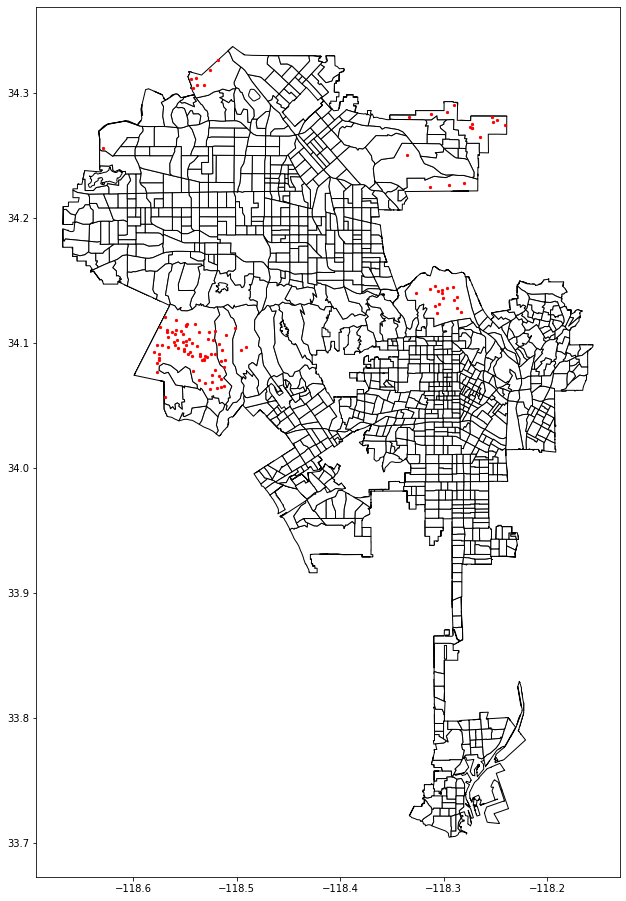

In [ ]:
#check to see where the missing values are
base = dem_df.plot(figsize=(24,16), color='white', edgecolor='black')
dem_df_filtered[dem_df_filtered['sound_score'] == 'ZERO_RESULT'].plot(ax=base, marker='o', color='red', markersize=5);

In [ ]:
##imputing missing values 'ZERO_RESULT" with minimum soundscore (50) based on above map (areas with such a low score that they dont)
#replace missing value 'ZERO_RESULT' with np nan
dem_df_filtered = dem_df_filtered.replace('ZERO_RESULT', np.nan)

In [ ]:
dem_df_filtered.dtypes

OID                     int64
avg_hh_size           float64
pop_growth_rt         float64
med_age               float64
unemply_rate          float64
hisp_pop                int64
wht_pop                 int64
blk_pop                 int64
ai_na_pop               int64
asn_pop                 int64
pi_pop                  int64
othr_pop                int64
mtpl_pop                int64
divst_indx            float64
med_inc                 int64
avg_inc                 int64
local_noise            object
airport_noise          object
traffic_noise          object
sound_score            object
geometry             geometry
tot_pop_sum             int64
pct_pop_growth_rt     float64
pct_hisp_pop          float64
pct_wht_pop           float64
pct_blk_pop           float64
pct_ai_na_pop         float64
pct_asn_pop           float64
pct_pi_pop            float64
pct_othr_pop          float64
pct_mtpl_pop          float64
dtype: object

In [ ]:
#convert all sound values to numeric (int64)
dem_df_filtered['local_noise'] = pd.to_numeric(dem_df_filtered['local_noise'])
dem_df_filtered['airport_noise'] = pd.to_numeric(dem_df_filtered['airport_noise'])
dem_df_filtered['traffic_noise'] = pd.to_numeric(dem_df_filtered['traffic_noise'])
dem_df_filtered['sound_score'] = pd.to_numeric(dem_df_filtered['sound_score'])
dem_df_filtered.dtypes


OID                     int64
avg_hh_size           float64
pop_growth_rt         float64
med_age               float64
unemply_rate          float64
hisp_pop                int64
wht_pop                 int64
blk_pop                 int64
ai_na_pop               int64
asn_pop                 int64
pi_pop                  int64
othr_pop                int64
mtpl_pop                int64
divst_indx            float64
med_inc                 int64
avg_inc                 int64
local_noise           float64
airport_noise         float64
traffic_noise         float64
sound_score           float64
geometry             geometry
tot_pop_sum             int64
pct_pop_growth_rt     float64
pct_hisp_pop          float64
pct_wht_pop           float64
pct_blk_pop           float64
pct_ai_na_pop         float64
pct_asn_pop           float64
pct_pi_pop            float64
pct_othr_pop          float64
pct_mtpl_pop          float64
dtype: object

In [ ]:
#fill nan values with the min sound score based on the knowledge that missing values occur only in the most quiet areas
dem_df_filtered['local_noise'].fillna(value=dem_df_filtered['local_noise'].min(), inplace=True)
dem_df_filtered['airport_noise'].fillna(value=dem_df_filtered['airport_noise'].min(), inplace=True)
dem_df_filtered['traffic_noise'].fillna(value=dem_df_filtered['traffic_noise'].min(), inplace=True)
dem_df_filtered['sound_score'].fillna(value=dem_df_filtered['sound_score'].max(), inplace=True)

In [ ]:
len(dem_df_filtered[dem_df_filtered['sound_score'] == np.nan])

0

In [ ]:
dem_df_filtered.to_file(r'/content/drive/My Drive/550/Final_Project/demographic_sounds_points_clean.geojson', driver='GeoJSON')

# **Exploratory Plotting**

In [ ]:
sound_df = gpd.read_file(r'/content/drive/My Drive/550/Final_Project/demographic_sounds_points_clean.geojson')

In [ ]:
sound_df_smol = sound_df[['pop_growth_rt','med_age', 'unemply_rate','divst_indx',
                          'med_inc','local_noise','airport_noise',	'traffic_noise',
                          'sound_score','pct_pop_growth_rt', 'pct_hisp_pop','pct_wht_pop',
                          'pct_blk_pop','pct_ai_na_pop','pct_asn_pop','pct_pi_pop',
                          'pct_othr_pop',	'pct_mtpl_pop', 'med_inc']]

In [ ]:
mean_value = sound_df['pct_othr_pop'].mean()
sound_df_smol['pct_othr_pop'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


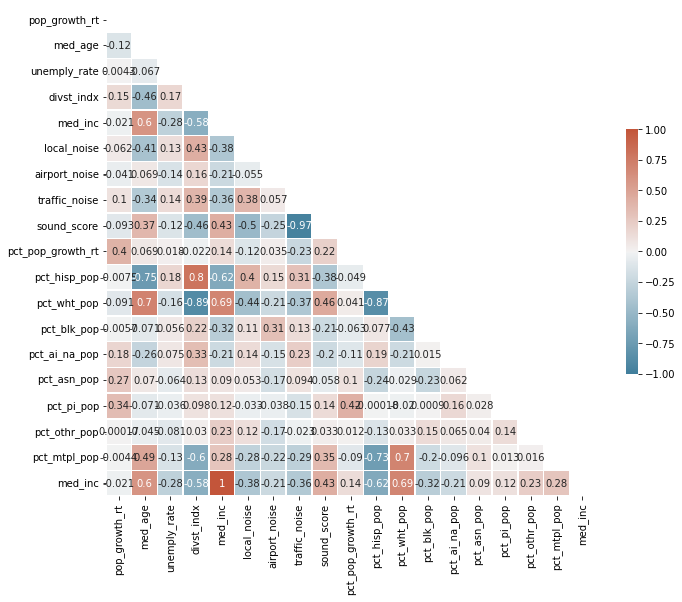

In [ ]:
##Pearson's R matrix with all variables
corr = sound_df_smol.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,  annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

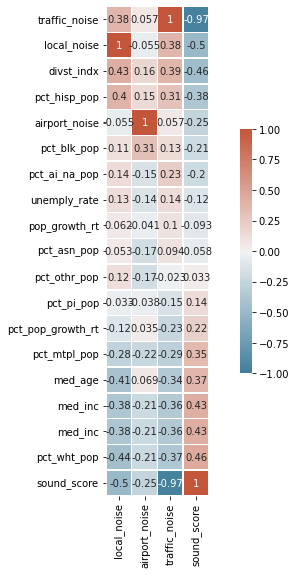

In [ ]:
##Pearson's R Correlation Matrix with only target varables

corr = sound_df_smol.corr()[['local_noise', 'airport_noise','traffic_noise','sound_score']].sort_values(by=['sound_score','local_noise','traffic_noise','airport_noise'], ascending=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,  annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

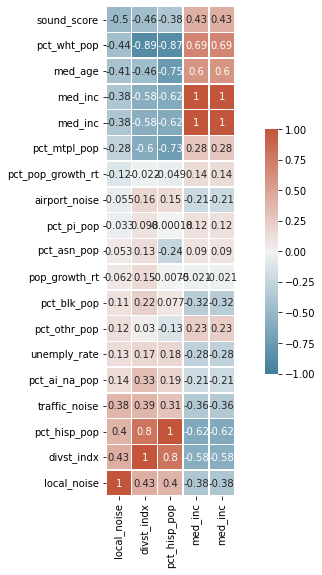

In [ ]:
##Pearson's R Correlation Matrix with only target varables

corr = sound_df_smol.corr()[['local_noise', 'divst_indx','pct_hisp_pop', 'med_inc']].sort_values(by=['local_noise', 'divst_indx','pct_hisp_pop'], ascending=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,  annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

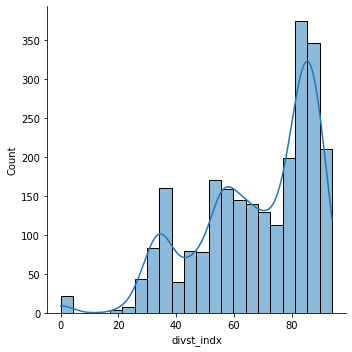

In [ ]:
#diversity index
sns.displot(data=sound_df_smol, x="divst_indx", kde=True)

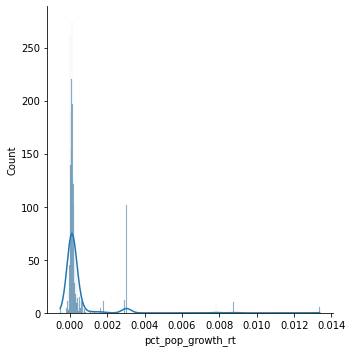

In [ ]:
#pct_pop_growth_rate
sns.displot(data=sound_df_smol, x="pct_pop_growth_rt", kde=True)

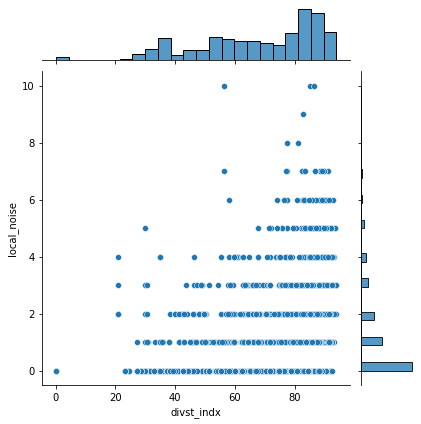

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="divst_indx", y="local_noise",
)

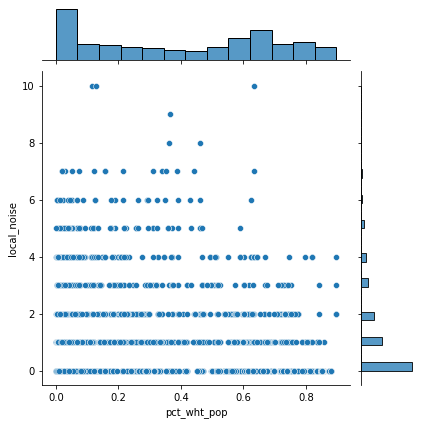

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="pct_wht_pop", y="local_noise",
)

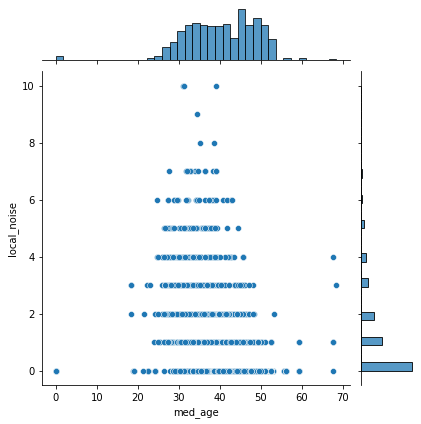

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="med_age", y="local_noise",
)

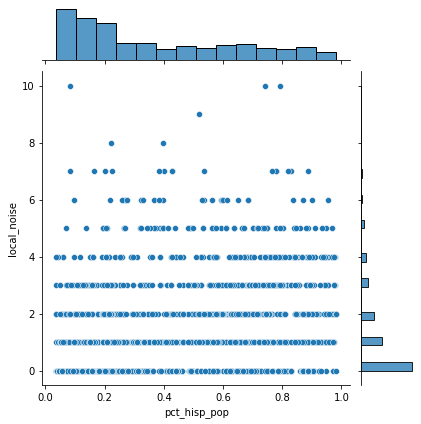

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="pct_hisp_pop", y="local_noise",
)

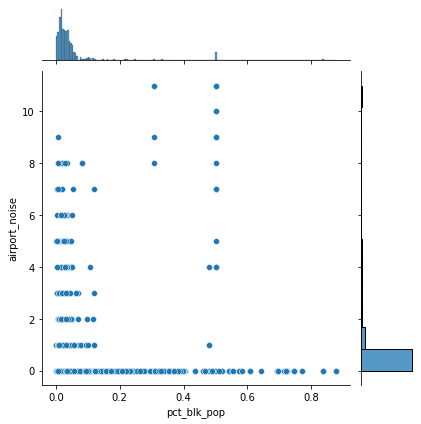

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="pct_blk_pop", y="airport_noise",
)

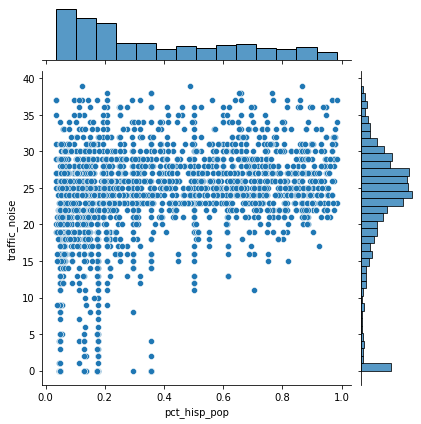

In [ ]:
sns.jointplot(
    data=sound_df_smol,
    x="pct_hisp_pop", y="traffic_noise",
)